In [78]:
"""
This project is about simple text classification and sentiment analysis based on Movie 
review dataset. 

Dataset: 
X = review of movies 
y = positive/negative 

For Text Classification: 
Naive Bayes and SVM are used to do classification 

For sentiment analysis NLTK is used. 
"""

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix as cm, classification_report, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jyu11\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


s:\Anaconda_dir\envs\nlp_course\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [22]:
#load data
df = pd.read_csv("TextFiles/moviereviews.tsv",sep='\t')
df.head()

#remove null values
df.dropna(inplace=True)
df.isnull().sum()

#split data 
X = df['review']
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [71]:
#build ML pipeline - NB
text_pipeline_NB = Pipeline([('tf_idf',TfidfVectorizer()),
                     ('NB',MultinomialNB())])

In [74]:
#Train the model NB
text_pipeline_NB.fit(X_train,y_train)
pred_NB = text_pipeline_NB.predict(X_test)

s:\Anaconda_dir\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


0.7203389830508474

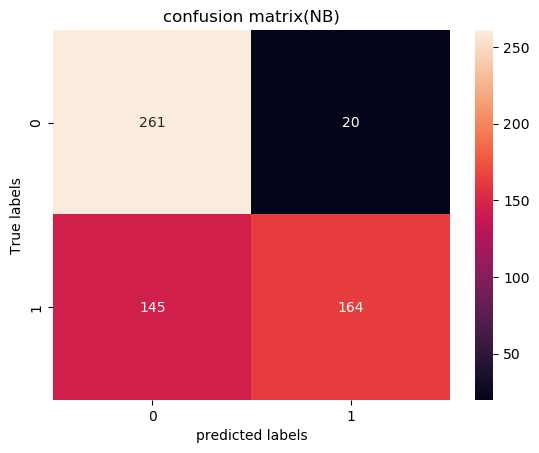

In [90]:
#Result
cm_NB = cm(y_test,pred_NB)
ax = plt.subplot()
sns.heatmap(cm_NB, annot = True, 
            fmt='g',ax=ax)

ax.set_xlabel("predicted labels")
ax.set_ylabel("True labels")
ax.set_title("confusion matrix(NB)")
accuracy_score(y_test,pred_NB)

In [92]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

         neg       0.64      0.93      0.76       281
         pos       0.89      0.53      0.67       309

   micro avg       0.72      0.72      0.72       590
   macro avg       0.77      0.73      0.71       590
weighted avg       0.77      0.72      0.71       590



In [23]:
#build ML pipeline - SVM
text_pipeline_svm = Pipeline([('tf_idf',TfidfVectorizer()),
                     ('svm',LinearSVC())])

In [24]:
#Train the model SVM
text_pipeline_svm.fit(X_train,y_train)
pred_svm = text_pipeline_svm.predict(X_test)

s:\Anaconda_dir\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


0.8135593220338984

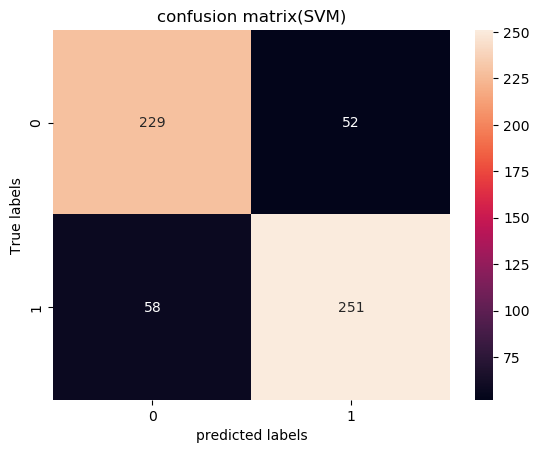

In [89]:
#Result
cm_SVM = cm(y_test,pred_svm)
ax = plt.subplot()
sns.heatmap(cm_SVM, annot = True, 
            fmt='g',ax=ax)

ax.set_xlabel("predicted labels")
ax.set_ylabel("True labels")
ax.set_title("confusion matrix(SVM)")
accuracy_score(y_test,pred_svm)

In [91]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       281
         pos       0.83      0.81      0.82       309

   micro avg       0.81      0.81      0.81       590
   macro avg       0.81      0.81      0.81       590
weighted avg       0.81      0.81      0.81       590



In [77]:
#Senmantic analysis 
#remove reviews which are not null but only contains space
blanks = [] 
for index,label,x in df.itertuples():
    if type(x) == str:
        if x.isspace():
            blanks.append(index)
df.drop(blanks, inplace=True)

In [85]:
analyzer = SentimentIntensityAnalyzer(); 
df['polarity'] = df['review'].apply(lambda review:analyzer.polarity_scores(review))
df['scores'] = df['polarity'].apply(lambda d:d['compound'])
df['pred_label'] = df['scores'].apply(lambda score:'pos' if score > 0 else 'neg')

0.6367389060887513

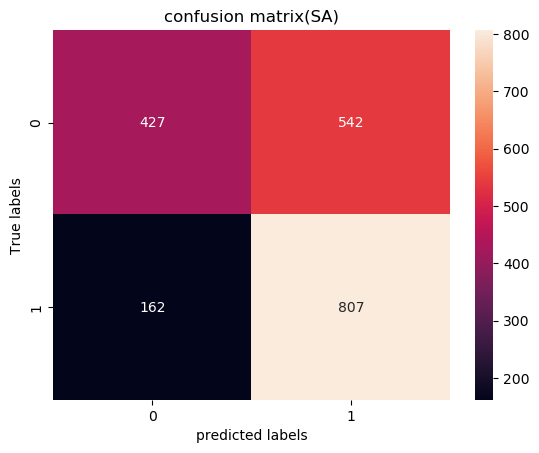

In [95]:
#Result
cm_SA= cm(df['label'], df['pred_label'])
ax = plt.subplot()
sns.heatmap(cm_SA, annot = True, 
            fmt='g',ax=ax)

ax.set_xlabel("predicted labels")
ax.set_ylabel("True labels")
ax.set_title("confusion matrix(SA)")
accuracy_score(df['label'], df['pred_label'])

In [94]:
print(classification_report(df['label'], df['pred_label']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

   micro avg       0.64      0.64      0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938

